In [4]:
import tensorflow as tf
import os

In [10]:
# Limiting tensorflow from using all the memory that can cause OOM error
gpus = tf.config.experimental.list_physical_devices("GPU")
gpus

[]

In [8]:
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

## Removing Doggy Images  

In [13]:
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Hp\AppData\Local\Temp\ipykernel_9604\2622808212.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [14]:
data__dir = "Data"

In [15]:
image_exts = ['jpg', "png", "jpeg", "bmp"]

In [16]:
image_exts

['jpg', 'png', 'jpeg', 'bmp']

In [17]:
for image_class in os.listdir(data__dir):
  for image in os.listdir(os.path.join(data__dir, image_class)):
    image_path = os.path.join(data__dir, image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)

      if tip not in image_exts:
        print("Image not in ext list {}".format(image_path))
        os.remove(image_path)

    except Exception as e:
      print("Issue with image {}".format(image_path))

## Loading data

In [ ]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, shape=(), dtype=int32)

  To process lines from files, use 

In [19]:
data = tf.keras.utils.image_dataset_from_directory("Data")

Found 178 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

In [23]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

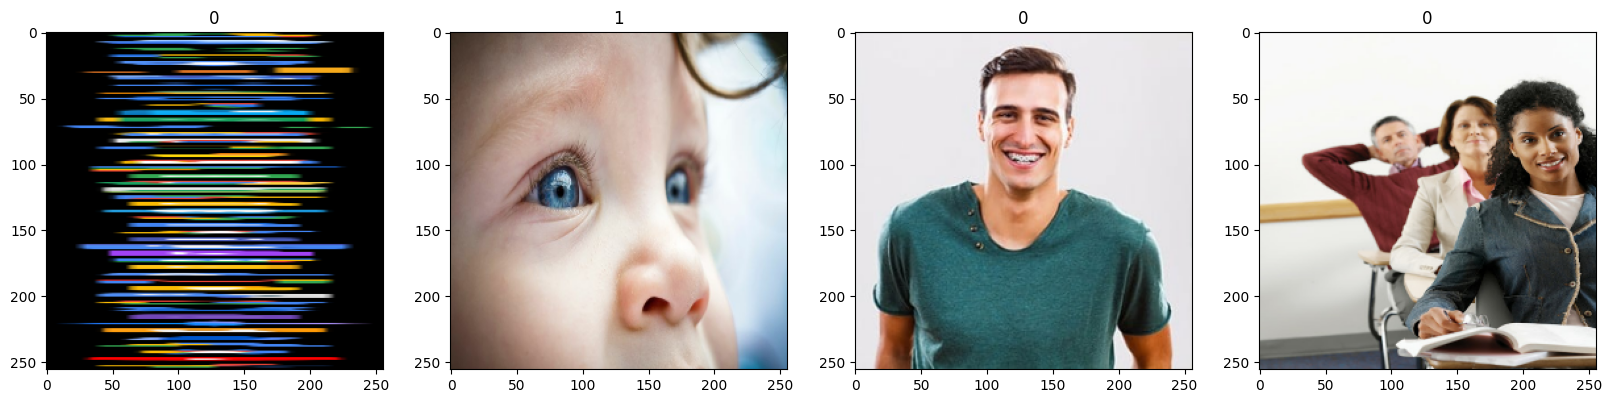

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
